<a href="https://colab.research.google.com/github/H-b-IO-T-O-H/ML_lr1/blob/main/lr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
figsize(13, 10) # зададим размер картинки

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/winequality-red.csv', sep=',')
data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 

Сразу разделим данные на тренировочную и валидационную выборки

In [ ]:
data.describe() # смотрим перцентили + сравниваем min/max


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.isnull().sum() # -
data.duplicated().sum() # 240
data.drop_duplicates().reset_index(drop=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


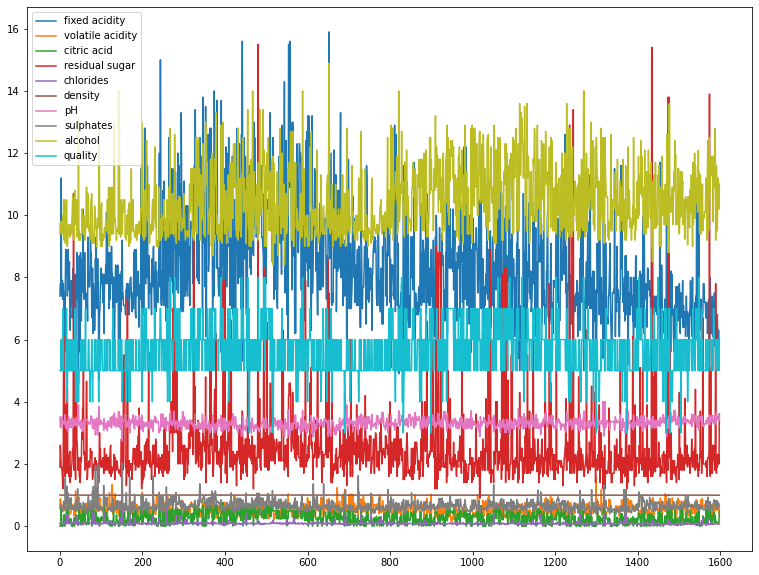

In [ ]:
#data.plot()
#data['total sulfur dioxide'].plot()
#data = data.drop(['total sulfur dioxide', 'free sulfur dioxide'], axis='columns')
data.plot()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('quality', axis='columns'), data['quality'], stratify=data['quality'])

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import FunctionTransformer

pipeline = make_pipeline(
    #FunctionTransformer(dropper, validate=False),                 # добавили удаление признаков в пайплайн;
                                                                  # параметр validate=False - чтобы функция не пыталась привести все признаки к числам
    #FunctionTransformer(other_transformations, validate=False),   # добавили остальные трансформации признаков
    MinMaxScaler(),                               # нормализацию
    KNeighborsClassifier(n_neighbors=8),          # и сам классификатор с наилучшими параметрами
)

pipeline

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=8))])

In [ ]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.685

За счет удаления дублей удалось повысить правильность классификации.

Сохранение модели
Последнее, что осталось сделать, - сохранить обученную модель. Тут всё очень просто: нам потребуется библиотека pickle и сама обученная модель.

In [ ]:
import pickle

with open("/content/drive/My Drive/Colab Notebooks/lab2_model.pickle", 'wb') as opened_file:
    pickle.dump(pipeline, opened_file)

In [ ]:
import pandas as pd
import pickle

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/winequality-red.csv', sep=',')
X_train, X_test, y_train, y_test = train_test_split(data.drop('quality', axis='columns'), data['quality'], stratify=data['quality'])

with open("/content/drive/My Drive/Colab Notebooks/lab2_model.pickle", 'rb') as f:
    model = pickle.load(f)

#model.fit(X_train, y_train)
model.score(X_test, y_test)

0.685

Попробуем другие классификаторы для данной задачи

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.svm import SVC as svc 
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.neighbors import KNeighborsClassifier as kng

for clf in[dtc(), sgd(), svc(), gnb(), kng(n_neighbors=8)]:
  print(clf.__class__.__name__, clf.fit(X_train, y_train).score(X_test, y_test))

DecisionTreeClassifier 0.6
SGDClassifier 0.575
SVC 0.4975
GaussianNB 0.525
KNeighborsClassifier 0.51
